## Project: Querying and Filtering Pokemon data

This project will help you practice your pandas querying and filtering skills. Let's begin!

![Pokemon](output0.png)

## Setup

There isn't much to do here, we'll provide the required imports and the read the pokemon CSV we'll be working with.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("pokemon.csv")

In [36]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### 0. Can you get the value counts of `Type 1` column?

In [6]:
df ['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

##### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

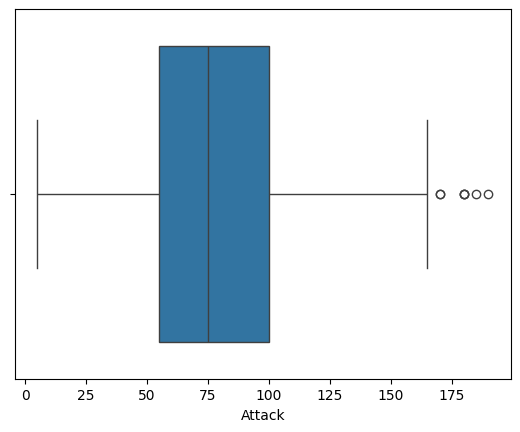

In [9]:
sns.boxplot(data=df, x='Attack')

In [10]:
df[df ['Attack'] > 150].shape[0]

18

##### 2. Select all pokemons with a Speed of `10` or less

In [11]:
slow_pokemons_df = df[df['Speed'] <= 10]
slow_pokemons_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


##### 3. How many Pokemons have a `Sp. Def` value of 25 or less?

In [12]:
df[df['Sp. Def'] <= 25].shape[0]


18

##### 4. Select all the Legendary pokemons

In [13]:

legendary_df = df[df['Legendary'] == True]
legendary_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


##### 5. Find the outlier

Find the pokemon that is clearly an outlier in terms of Attack / Defense:

![Who's this guy?](output1.png)

In [24]:
outlierPokeman = df.sort_values(by='Defense' , ascending=False).head(5)
outlierPokeman[['Name' , 'Attack' , 'Defense']]

,Name,Attack,Defense
333,AggronMega Aggron,140,230
224,SteelixMega Steelix,125,230
230,Shuckle,10,230
223,Steelix,85,200
414,Regirock,100,200


**before you go ahead can you explain to me what is an outiler ??**

Your Explanation:


An outlier is a data point that significantly differs from other values in a dataset. It is either much higher or lower than the majority of the data points.
- so the outlier must be in the highest Defense 

##### 6. How many Fire-Flying Pokemons are there?
##### Type 1 fire and Type 2 Flying ???

In [30]:
fire_flying_counter = df[(df["Type 1"] == "Fire") & (df["Type 2"] == "Flying")].shape[0]
print(f"Number of Fire-Flying Pokemons: {fire_flying_counter}")


Number of Fire-Flying Pokemons: 6


##### 7. How many 'Poison' pokemons are across both types?

In [ ]:
poisonCounter= df[(df["Type 1"] == "Poison") | (df["Type 2"] == "Poison")].shape[0]
print(f"Number of Poison-type Pokemons: {poisonCounter}")

Number of Poison-type Pokemons: 62


##### 8. Name the pokemon of `Type 1` *Ice* which has the strongest defense?
##### I heard his name is Avalugg !!

In [ ]:
icePokemon = df[df["Type 1"] == "Ice"] 
strongestDefense = icePokemon.loc[icePokemon["Defense"].idxmax()]
print(f"Pokemon: {strongestDefense['Name']}, Defense: {strongestDefense['Defense']}")

Pokemon: Avalugg, Defense: 184


##### 9. What's the most common `Type 1` of Legendary Pokemons?

In [37]:
legendaryPokemon = df[df["Legendary"] == True]
mostCommon = legendaryPokemon["Type 1"].value_counts().idxmax()
print(f"The most common Type 1 among Legendary Pokemons is: {mostCommon}")

The most common Type 1 among Legendary Pokemons is: Psychic
